In [1]:
# Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# string Date time into Python Date time object and setting the date as index

In [4]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

In [5]:
# Loading the Dataset

In [6]:
url="https://raw.githubusercontent.com/suminasunil/car-sales-forecasing/main/sales%20of%20cars.csv"
df = pd.read_csv(url, index_col=0, parse_dates=[0],date_parser=parser)

In [7]:
# Summarize first few rows

In [8]:
df.head()

,Sales
Month,
2016-01-01,182
2016-02-01,203
2016-03-01,254
2016-04-01,265
2016-05-01,215


In [9]:
# Description of the Data in the DataFrame

In [10]:
df.describe()

,Sales
count,72.000000
mean,167.277778
std,82.118469
min,8.000000
25%,104.750000
50%,153.500000
75%,209.250000
max,368.000000


In [11]:
# Plotting the dataset

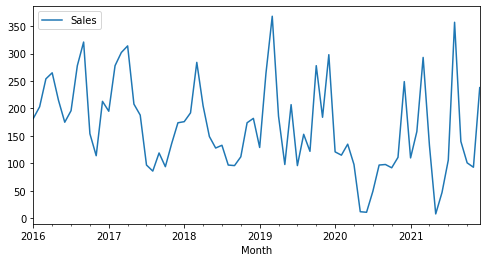

In [71]:

fig = df.plot(figsize=(8,4))


In [13]:
# Seasonal Decompose

In [14]:
import statsmodels.api as sm

<Figure size 432x288 with 0 Axes>

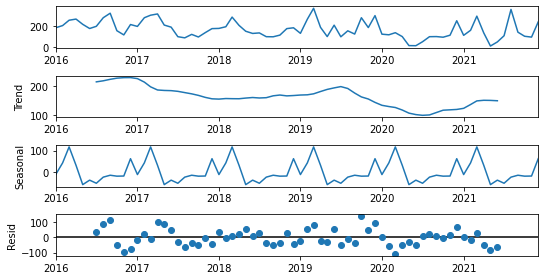

In [72]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(8,4)


In [16]:
# Plotting Seasonality

<AxesSubplot:xlabel='Month'>

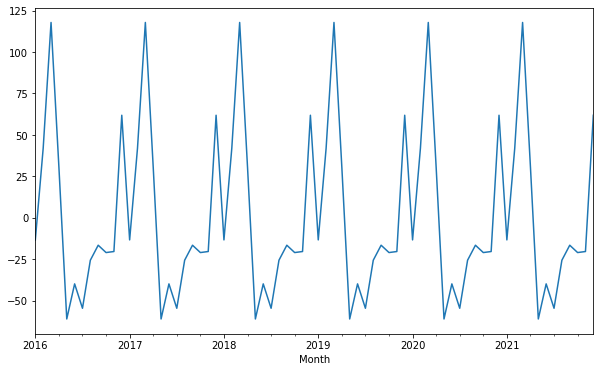

In [17]:

decomposition.seasonal.plot(figsize=(10,6))

In [18]:
# Plotting Trend

<AxesSubplot:xlabel='Month'>

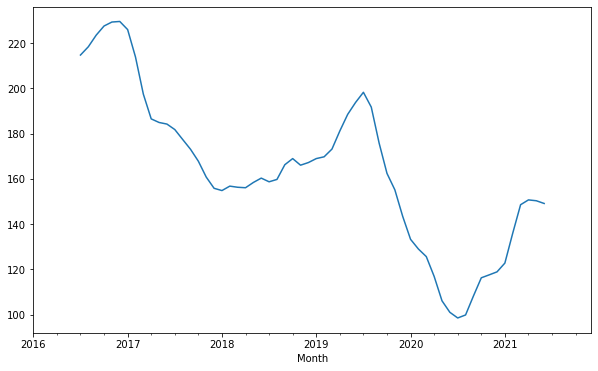

In [19]:

decomposition.trend.plot(figsize=(10,6))

In [20]:
# Stationarity test

In [21]:
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(df):
    result=adfuller(df)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")  

In [22]:
# Test Result

In [23]:
test_result=adfuller_test(df)

ADF Test Statistic : -5.193793964063138
p-value : 9.052237755760908e-06
#Lags Used : 0
Number of Observations Used : 71
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [24]:
#plotting Acf and Pacf graphs to get the values of P(AR) and Q(MA)

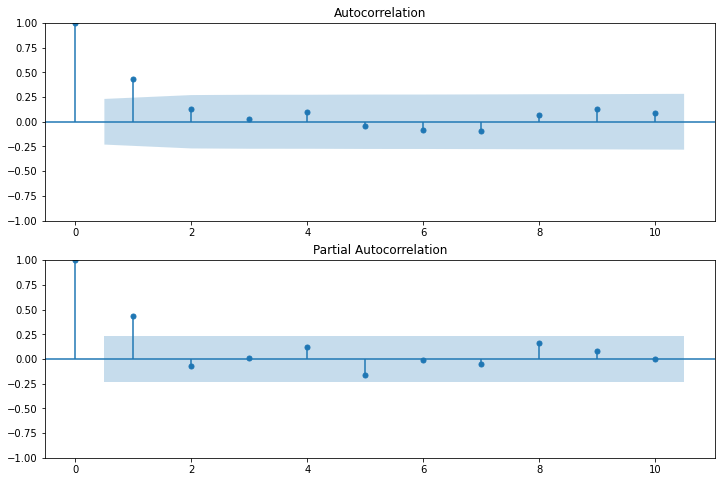

In [25]:

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df,lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df,lags=10,ax=ax2)

In [26]:
# Train - Test Splitting

In [27]:
len(df)

72

In [28]:
train=df[:58]
test=df[58:]

In [29]:
train.head()

,Sales
Month,
2016-01-01,182
2016-02-01,203
2016-03-01,254
2016-04-01,265
2016-05-01,215


In [30]:
test.head()

,Sales
Month,
2020-11-01,111
2020-12-01,249
2021-01-01,110
2021-02-01,158
2021-03-01,293


In [31]:
# ARIMA Model

In [32]:
# Importing Packages

In [33]:
from statsmodels.tsa.arima.model import ARIMA


In [34]:
model= ARIMA(train,order=(1,0,1)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
# Prediction on test data

In [36]:
pred=model.predict(start=len(train),end=(len(df)-1))

In [37]:
len(train), len(df)-1

(58, 71)

In [38]:
pred.head()

2020-11-01    126.120291
2020-12-01    145.382491
2021-01-01    156.049802
2021-02-01    161.957307
2021-03-01    165.228854
Freq: MS, Name: predicted_mean, dtype: float64

In [39]:
# Error Calculation

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
error=np.sqrt(mean_squared_error(test,pred))
error

94.9820963621576

In [42]:
test.mean(), np.sqrt(test.var())

(Sales    153.142857
 dtype: float64,
 Sales    97.127083
 dtype: float64)

In [43]:
# Plotting actual data and predictions on test data

<AxesSubplot:xlabel='Month'>

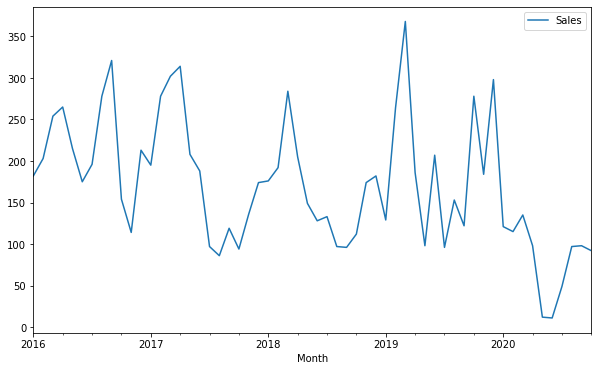

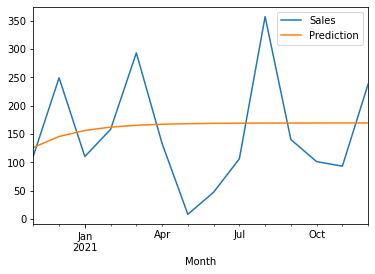

In [44]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='Prediction')

In [45]:
# Future Predictions

In [68]:
final_model= ARIMA(df,order=(1,0,1)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
prediction=final_model.predict(len(df), len(df)+23)

In [48]:
# Plotting future predictions

<AxesSubplot:xlabel='Month'>

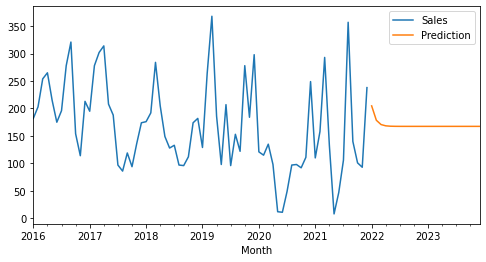

In [69]:
df.plot(legend=True, label='Train', figsize=(8,4))
prediction.plot(legend=True, label='Prediction')

In [50]:
prediction

2022-01-01    204.754246
2022-02-01    178.548832
2022-03-01    170.747993
2022-04-01    168.425836
2022-05-01    167.734575
2022-06-01    167.528800
2022-07-01    167.467545
2022-08-01    167.449311
2022-09-01    167.443883
2022-10-01    167.442267
2022-11-01    167.441786
2022-12-01    167.441643
2023-01-01    167.441600
2023-02-01    167.441587
2023-03-01    167.441584
2023-04-01    167.441582
2023-05-01    167.441582
2023-06-01    167.441582
2023-07-01    167.441582
2023-08-01    167.441582
2023-09-01    167.441582
2023-10-01    167.441582
2023-11-01    167.441582
2023-12-01    167.441582
Freq: MS, Name: predicted_mean, dtype: float64

In [51]:
# Auto Arima suggesting parameters for SARIMA

In [52]:
import pmdarima
from pmdarima import auto_arima
auto_arima(train, m=12, start_p=0, seasonal=True, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=654.910, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=650.821, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=649.976, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=652.937, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=652.748, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=650.755, Time=0.30 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=649.809, Time=0.39 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=654.340, Time=0.37 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=651.934, Time=0.54 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=653.783, Time=1.01 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=647.94

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [53]:
# SARIMA MODEL

In [54]:
import statsmodels.api as sm
Smodel=sm.tsa.statespace.SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,0,12)).fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
# Prediction on test data

In [56]:
Spred=Smodel.predict(start=len(train),end=(len(df)-1))

In [57]:
Spred.head()

2020-11-01     96.306112
2020-12-01    147.330399
2021-01-01    102.468493
2021-02-01    104.996014
2021-03-01    113.238030
Freq: MS, Name: predicted_mean, dtype: float64

In [58]:
# Error calculation

In [59]:
error=np.sqrt(mean_squared_error(test,Spred))
error

97.18314513470276

In [60]:
# Plotting predictions on test data

<AxesSubplot:xlabel='Month'>

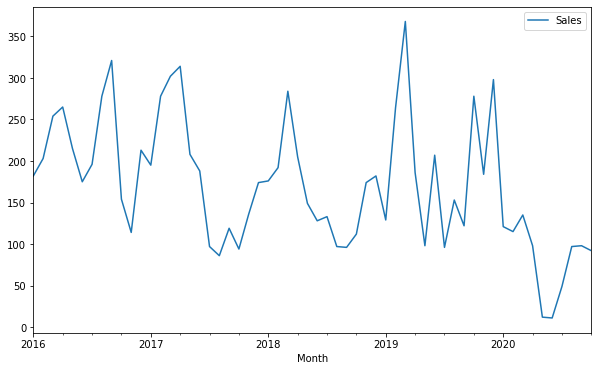

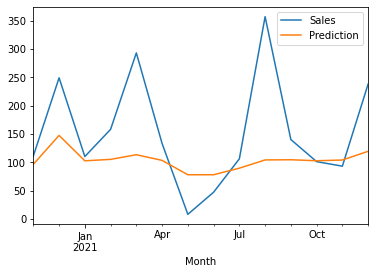

In [61]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
Spred.plot(legend=True, label='Prediction')

In [62]:
# Future predictions

In [63]:
Smodel=sm.tsa.statespace.SARIMAX(df,order=(1,1,1),seasonal_order=(1,0,0,12)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [64]:
Sprediction=Smodel.predict(len(df), len(df)+23)

In [65]:
# Plotting future predictions

<AxesSubplot:xlabel='Month'>

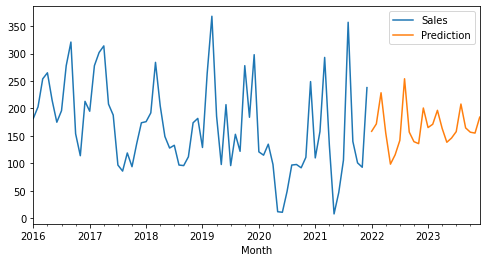

In [70]:
df.plot(legend=True, label='Train', figsize=(8,4))
Sprediction.plot(legend=True, label='Prediction')

In [67]:
Sprediction

2022-01-01    158.460410
2022-02-01    171.930462
2022-03-01    228.637381
2022-04-01    155.345070
2022-05-01     98.630672
2022-06-01    115.716899
2022-07-01    141.947084
2022-08-01    254.172151
2022-09-01    157.046327
2022-10-01    139.580476
2022-11-01    135.993515
2022-12-01    200.865900
2023-01-01    165.276681
2023-02-01    171.302704
2023-03-01    196.674167
2023-04-01    163.881565
2023-05-01    138.506338
2023-06-01    146.151023
2023-07-01    157.886916
2023-08-01    208.098643
2023-09-01    164.642607
2023-10-01    156.828036
2023-11-01    155.223157
2023-12-01    184.248357
Freq: MS, Name: predicted_mean, dtype: float64